C:\Users\laksh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\laksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


intercept:  544848.268832546
Test set evaluation:
------------------------------------------
MAE:  219833.01885136354
MSE:  989737379734.7007
RMSE:  994855.4567044907
R2 Square:  0.029523036136685832
__________________________________
Train set evaluation:
-------------------------------------------
MAE:  170682.52362261037
MSE:  72089747651.23639
RMSE:  268495.34009221906
R2 Square:  0.4926326247021383
__________________________________


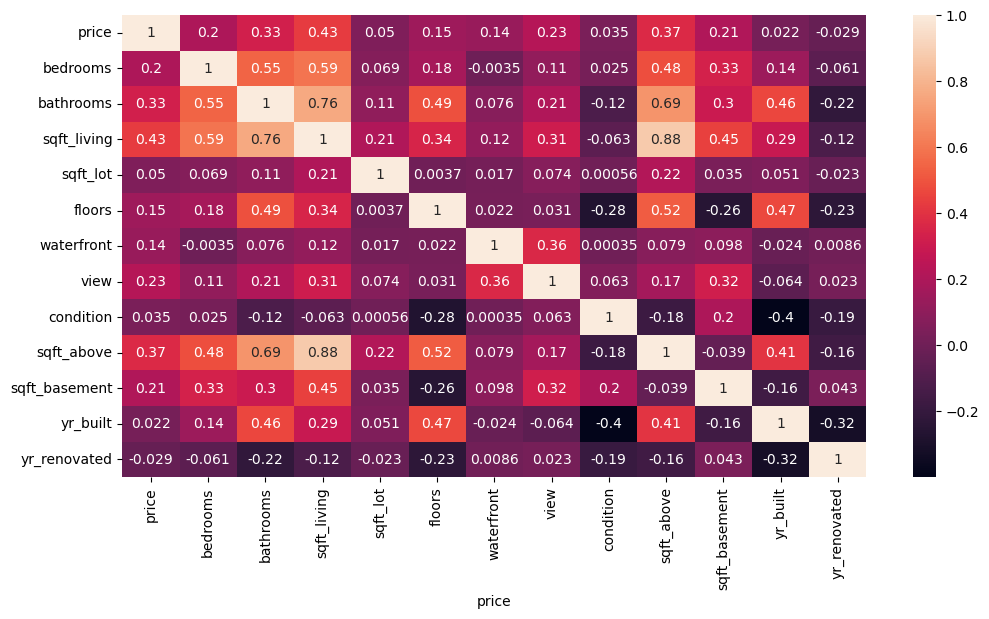

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read the CSV file
house_data = pd.read_csv('data.csv')
# head -> top five rows in datasets
house_data.head()
# sns.pairplot(house_data)
house_data_corr = house_data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(house_data_corr, annot = True)
X = house_data[['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'condition', 'sqft_above']]
y = house_data['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, test_size=0.2,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
X_test
# cross value score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

def cross_value(model):
    predict = cross_val_score(model, X, y, cv=10)
    return predict.mean()


def print_evaluate(true, predicted):
    mean_abs_error = metrics.mean_absolute_error(true, predicted)
    mean_squ_error = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squ_error)
    r2_square = metrics.r2_score(true, predicted)
    print('MAE: ', mean_abs_error)
    print('MSE: ', mean_squ_error)
    print('RMSE: ', rmse)
    print('R2 Square: ', r2_square)
    print('__________________________________')

# return mae, mse, rmse, r2_square
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression(normalize=True)
lin_model.fit(X_train, y_train)
# print the intercept and co
print('intercept: ', lin_model.intercept_)
coeff_df = pd.DataFrame(lin_model.coef_, X.columns, columns=['Coefficient'])
coeff_df
pred = lin_model.predict(X_test)
sns.scatterplot(y_test, pred)
test_pred = lin_model.predict(X_test)
train_pred = lin_model.predict(X_train)

print('Test set evaluation:\n------------------------------------------')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n-------------------------------------------')
print_evaluate(y_train, train_pred)